Mean Squared Error: 70.27659467835645
R-squared: 0.9718893621286574


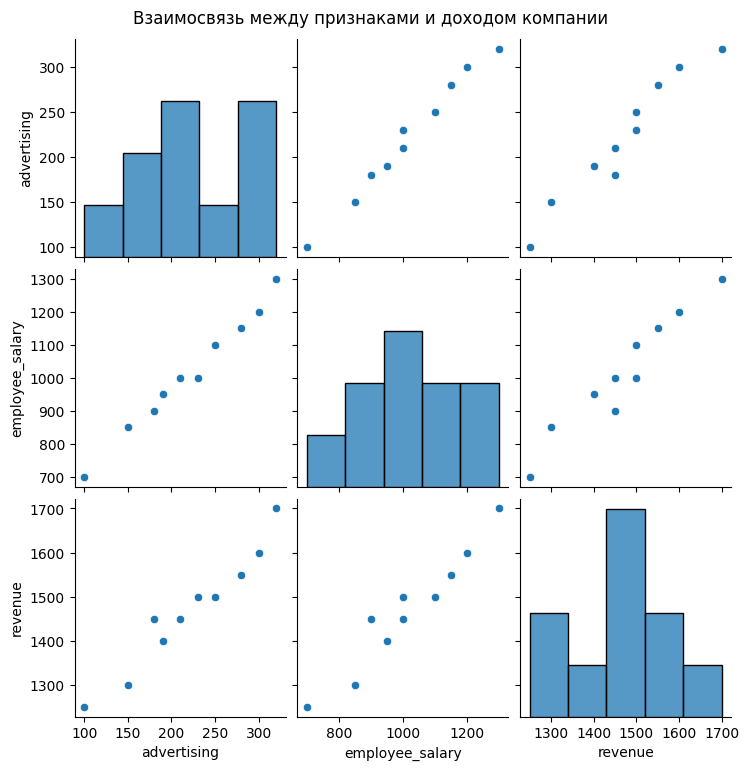

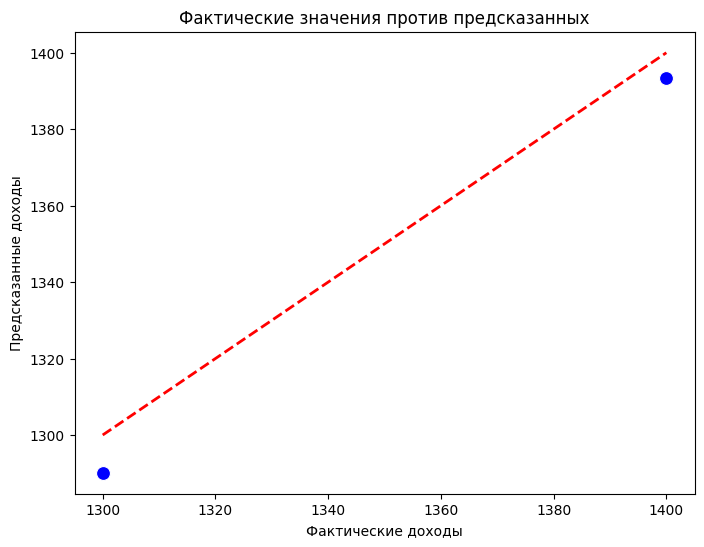

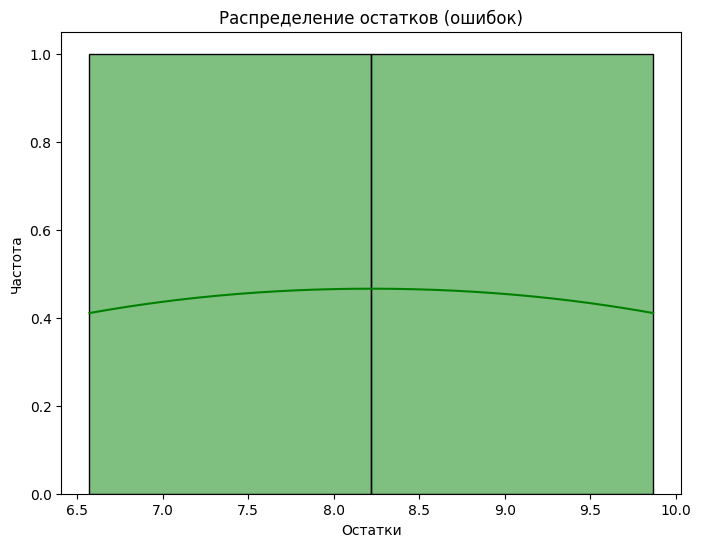

In [16]:
# Импортируем библиотеки для визуализации
import seaborn as sns
import matplotlib.pyplot as plt

# Генерируем примерные данные (как и в предыдущем примере)
data = {
    'advertising': [230, 150, 180, 300, 280, 320, 100, 250, 190, 210],
    'employee_salary': [1000, 850, 900, 1200, 1150, 1300, 700, 1100, 950, 1000],
    'revenue': [1500, 1300, 1450, 1600, 1550, 1700, 1250, 1500, 1400, 1450]
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Определяем признаки (X) и целевую переменную (y)
X = df[['advertising', 'employee_salary']]
y = df['revenue']

# Добавляем полиномиальные признаки (степени до 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Разделяем данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Используем Ridge-регрессию (с L2-регуляризацией)
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Прогнозируем значения на тестовой выборке
y_pred = ridge_model.predict(X_test)

# Оцениваем модель
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Визуализация 1: Взаимосвязь между признаками и доходом (до обучения модели)
sns.pairplot(df)
plt.suptitle('Взаимосвязь между признаками и доходом компании', y=1.02)
plt.show()

# Визуализация 2: Фактические значения против предсказанных (оценка модели)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=100, edgecolor='w')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Фактические значения против предсказанных')
plt.xlabel('Фактические доходы')
plt.ylabel('Предсказанные доходы')
plt.show()

# Визуализация 3: Остатки (разница между фактическими и предсказанными значениями)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green')
plt.title('Распределение остатков (ошибок)')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()
